# Importing library

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Loading data

Dataset obtained from [here](https://datahack.analyticsvidhya.com/contest/practice-problem-loan-prediction-iii/)

In [2]:
pd.read_csv('train.csv').shape 


(614, 13)

In [3]:
pd.read_csv('test.csv').shape

(367, 12)

Therefore we have 614 training examples and 367 testing examples.

In [4]:
df_train = pd.read_csv('train.csv', index_col=0)
X_test = pd.read_csv('test.csv', index_col=0)
df_train.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
Loan_ID,,,,,,,,,,,,
LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


### Unique values in categorical features

In [5]:
print(df_train['Gender'].unique())
print(df_train['Married'].unique())
print(df_train['Education'].unique())
print(df_train['Self_Employed'].unique())
print(df_train['Property_Area'].unique())
print(df_train['Loan_Status'].unique())

['Male' 'Female' nan]
['No' 'Yes' nan]
['Graduate' 'Not Graduate']
['No' 'Yes' nan]
['Urban' 'Rural' 'Semiurban']
['Y' 'N']


### Converting categorical features into numeric forms

In [6]:
df_train["Education"] = df_train["Education"].apply(lambda x: 1 if x == "Graduate" else 0)
df_train["Married"] = df_train["Married"].apply(lambda x: 1 if x == "Yes" else 0)
df_train["Gender"] = df_train["Gender"].apply(lambda x: 1 if x == "Male" else 0)
df_train["Self_Employed"] = df_train["Self_Employed"].apply(lambda x: 1 if x == "Yes" else 0)
df_train["Loan_Status"] = df_train["Loan_Status"].apply(lambda x: 1 if x == "Y" else 0)
df_train["Dependents"] = df_train["Dependents"].apply(lambda x: '3' if x == "3+" else x)
df_train['Dependents'] = pd.to_numeric(df_train['Dependents'])

def change_Property_Area(Property_Area):
    if Property_Area == "Urban":
        return 3
    elif Property_Area == "Semiurban":
        return 2
    elif Property_Area == "Rural":
        return 1
    
df_train["Property_Area"] = df_train["Property_Area"].apply(change_Property_Area)
df_train.rename(columns = {'Gender' : 'Male', 'Education' : 'Graduated'}, inplace=True)
df_train.head()





,Male,Married,Dependents,Graduated,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
Loan_ID,,,,,,,,,,,,
LP001002,1,0,0.0,1,0,5849,0.0,NaN,360.0,1.0,3,1
LP001003,1,1,1.0,1,0,4583,1508.0,128.0,360.0,1.0,1,0
LP001005,1,1,0.0,1,1,3000,0.0,66.0,360.0,1.0,3,1
LP001006,1,1,0.0,0,0,2583,2358.0,120.0,360.0,1.0,3,1
LP001008,1,0,0.0,1,0,6000,0.0,141.0,360.0,1.0,3,1


In [7]:
X_test["Education"] = X_test["Education"].apply(lambda x: 1 if x == "Graduate" else 0)
X_test["Married"] = X_test["Married"].apply(lambda x: 1 if x == "Yes" else 0)
X_test["Gender"] = X_test["Gender"].apply(lambda x: 1 if x == "Male" else 0)
X_test["Self_Employed"] = X_test["Self_Employed"].apply(lambda x: 1 if x == "Yes" else 0)
X_test["Dependents"] = X_test["Dependents"].apply(lambda x: '3' if x == "3+" else x)
X_test['Dependents'] = pd.to_numeric(X_test['Dependents'])

def change_Property_Area(Property_Area):
    if Property_Area == "Urban":
        return 3
    elif Property_Area == "Semiurban":
        return 2
    elif Property_Area == "Rural":
        return 1
    
X_test["Property_Area"] = X_test["Property_Area"].apply(change_Property_Area)
X_test.rename(columns = {'Gender' : 'Male', 'Education' : 'Graduated'}, inplace=True)
X_test.head()

,Male,Married,Dependents,Graduated,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
Loan_ID,,,,,,,,,,,
LP001015,1,1,0.0,1,0,5720,0,110.0,360.0,1.0,3
LP001022,1,1,1.0,1,0,3076,1500,126.0,360.0,1.0,3
LP001031,1,1,2.0,1,0,5000,1800,208.0,360.0,1.0,3
LP001035,1,1,2.0,1,0,2340,2546,100.0,360.0,NaN,3
LP001051,1,0,0.0,0,0,3276,0,78.0,360.0,1.0,3


## Filling NaN entries

In [8]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 614 entries, LP001002 to LP002990
Data columns (total 12 columns):
Male                 614 non-null int64
Married              614 non-null int64
Dependents           599 non-null float64
Graduated            614 non-null int64
Self_Employed        614 non-null int64
ApplicantIncome      614 non-null int64
CoapplicantIncome    614 non-null float64
LoanAmount           592 non-null float64
Loan_Amount_Term     600 non-null float64
Credit_History       564 non-null float64
Property_Area        614 non-null int64
Loan_Status          614 non-null int64
dtypes: float64(5), int64(7)
memory usage: 62.4+ KB


In [9]:
df_train['Dependents'].fillna(df_train['Dependents'].mode()[0], inplace=True)
df_train['LoanAmount'].fillna(df_train['LoanAmount'].mean(), inplace=True)
df_train['Loan_Amount_Term'].fillna(df_train['Loan_Amount_Term'].mean(), inplace=True)
df_train['Credit_History'].fillna(df_train['Credit_History'].mode()[0], inplace=True)

In [10]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 614 entries, LP001002 to LP002990
Data columns (total 12 columns):
Male                 614 non-null int64
Married              614 non-null int64
Dependents           614 non-null float64
Graduated            614 non-null int64
Self_Employed        614 non-null int64
ApplicantIncome      614 non-null int64
CoapplicantIncome    614 non-null float64
LoanAmount           614 non-null float64
Loan_Amount_Term     614 non-null float64
Credit_History       614 non-null float64
Property_Area        614 non-null int64
Loan_Status          614 non-null int64
dtypes: float64(5), int64(7)
memory usage: 62.4+ KB


In [11]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
Index: 367 entries, LP001015 to LP002989
Data columns (total 11 columns):
Male                 367 non-null int64
Married              367 non-null int64
Dependents           357 non-null float64
Graduated            367 non-null int64
Self_Employed        367 non-null int64
ApplicantIncome      367 non-null int64
CoapplicantIncome    367 non-null int64
LoanAmount           362 non-null float64
Loan_Amount_Term     361 non-null float64
Credit_History       338 non-null float64
Property_Area        367 non-null int64
dtypes: float64(4), int64(7)
memory usage: 34.4+ KB


In [12]:
X_test['Dependents'].fillna(X_test['Dependents'].mode()[0], inplace=True)
X_test['LoanAmount'].fillna(X_test['LoanAmount'].mean(), inplace=True)
X_test['Loan_Amount_Term'].fillna(X_test['Loan_Amount_Term'].mean(), inplace=True)
X_test['Credit_History'].fillna(X_test['Credit_History'].mode()[0], inplace=True)

In [13]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
Index: 367 entries, LP001015 to LP002989
Data columns (total 11 columns):
Male                 367 non-null int64
Married              367 non-null int64
Dependents           367 non-null float64
Graduated            367 non-null int64
Self_Employed        367 non-null int64
ApplicantIncome      367 non-null int64
CoapplicantIncome    367 non-null int64
LoanAmount           367 non-null float64
Loan_Amount_Term     367 non-null float64
Credit_History       367 non-null float64
Property_Area        367 non-null int64
dtypes: float64(4), int64(7)
memory usage: 34.4+ KB


## Correlation plot

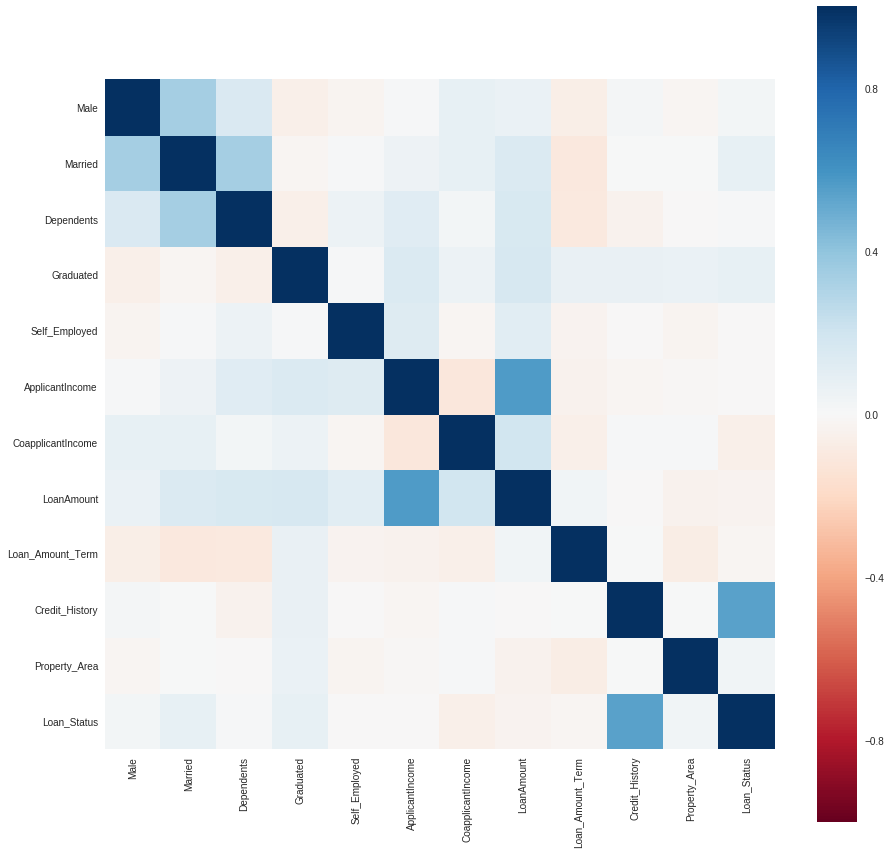

In [14]:
plt.figure(figsize=(15,15))
sns.heatmap(df_train.corr(), square=True, cmap='RdBu')
plt.show()

## Some Analysis

In [15]:
df_train.groupby(['Loan_Status']).mean()

,Male,Married,Dependents,Graduated,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
Loan_Status,,,,,,,,,,,
0,0.781250,0.588542,0.729167,0.729167,0.135417,5446.078125,1877.807292,150.945488,344.000000,0.572917,2.000000
1,0.803318,0.675355,0.751185,0.805687,0.132701,5384.068720,1504.516398,144.349606,341.090047,0.983412,2.054502


In [16]:
df_train.describe()

,Male,Married,Dependents,Graduated,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
count,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000
mean,0.796417,0.648208,0.744300,0.781759,0.133550,5403.459283,1621.245798,146.412162,342.000000,0.855049,2.037459,0.687296
std,0.402991,0.477919,1.009623,0.413389,0.340446,6109.041673,2926.248369,84.037468,64.372489,0.352339,0.787482,0.463973
min,0.000000,0.000000,0.000000,0.000000,0.000000,150.000000,0.000000,9.000000,12.000000,0.000000,1.000000,0.000000
25%,1.000000,0.000000,0.000000,1.000000,0.000000,2877.500000,0.000000,100.250000,360.000000,1.000000,1.000000,0.000000
50%,1.000000,1.000000,0.000000,1.000000,0.000000,3812.500000,1188.500000,129.000000,360.000000,1.000000,2.000000,1.000000
75%,1.000000,1.000000,1.000000,1.000000,0.000000,5795.000000,2297.250000,164.750000,360.000000,1.000000,3.000000,1.000000
max,1.000000,1.000000,3.000000,1.000000,1.000000,81000.000000,41667.000000,700.000000,480.000000,1.000000,3.000000,1.000000


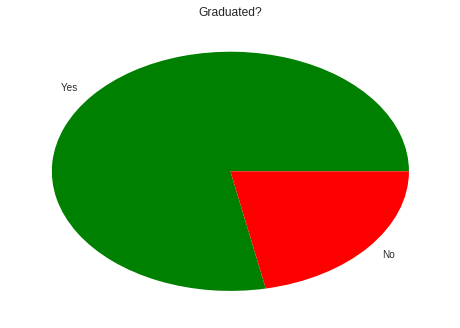

In [17]:
plt.pie([(df_train['Graduated'] == 1).sum(), (df_train['Graduated'] == 0).sum()], labels=['Yes', 'No'] ,colors=['g', 'r'])
plt.title('Graduated?')
plt.show()

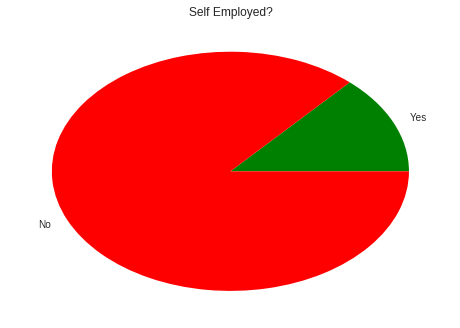

In [18]:
plt.pie([(df_train['Self_Employed'] == 1).sum(), (df_train['Self_Employed'] == 0).sum()], labels=['Yes', 'No'] ,colors=['g', 'r'])
plt.title('Self Employed?')
plt.show()

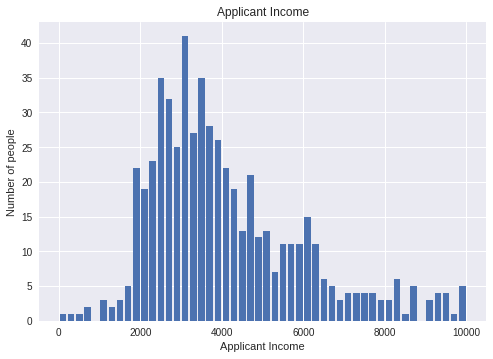

In [19]:
plt.hist(df_train['ApplicantIncome'], bins=50, range=(0, 10000), rwidth=0.8)
plt.title('Applicant Income')
plt.xlabel('Applicant Income')
plt.ylabel('Number of people')
plt.show()

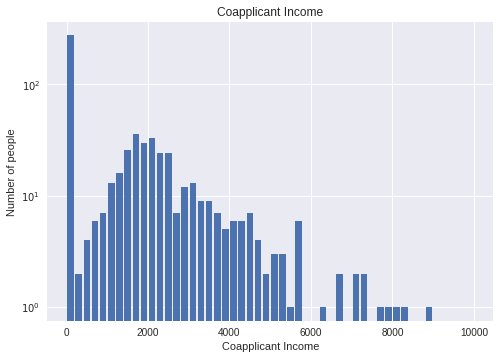

In [20]:
plt.hist(df_train['CoapplicantIncome'], bins=50, range=(0, 10000), rwidth=0.8)
plt.title('Coapplicant Income')
plt.xlabel('Coapplicant Income')
plt.yscale('log')
plt.ylabel('Number of people')
plt.show()

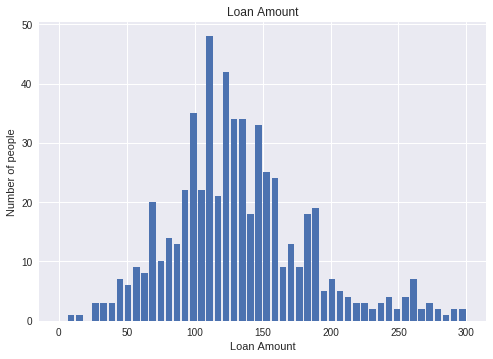

In [21]:
plt.hist(df_train['LoanAmount'], bins=50, range=(0, 300), rwidth=0.8)
plt.title('Loan Amount')
plt.xlabel('Loan Amount')
plt.ylabel('Number of people')
plt.show()

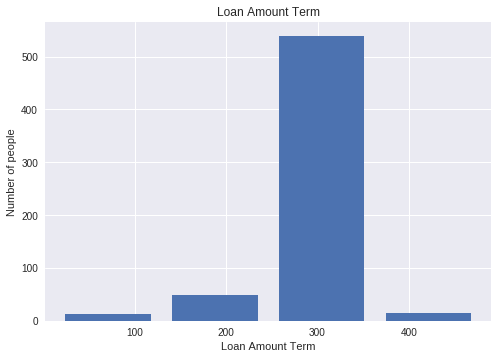

In [22]:
plt.hist(df_train['Loan_Amount_Term'], bins=4, rwidth=0.8)
plt.title('Loan Amount Term')
plt.xlabel('Loan Amount Term')
plt.ylabel('Number of people')
plt.show()

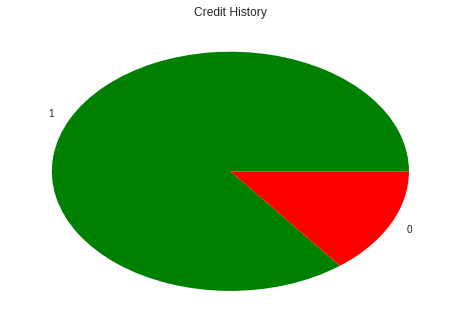

In [23]:
plt.pie([(df_train['Credit_History'] == 1).sum(), (df_train['Credit_History'] == 0).sum()], labels=['1', '0'] ,colors=['g', 'r'])
plt.title('Credit History')
plt.show()

In [24]:
credit_history = pd.DataFrame({'Credit_History_1':(df_train[df_train['Credit_History'] == 1].groupby(['Loan_Status']).count() / df_train[df_train['Credit_History'] == 1].count())['Male']
, 'Credit_History_0' : (df_train[df_train['Credit_History'] == 0].groupby(['Loan_Status']).count() / df_train[df_train['Credit_History'] == 0].count())['Male']})
credit_history

,Credit_History_0,Credit_History_1
Loan_Status,,
0,0.921348,0.209524
1,0.078652,0.790476


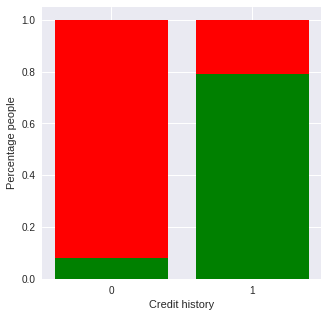

In [25]:
plt.figure(figsize=(5, 5))
plt.bar(left=[0, 1], height=[credit_history['Credit_History_0'][1], credit_history['Credit_History_1'][1]], color='g')
plt.bar(left=[0, 1], height=[credit_history['Credit_History_0'][0], credit_history['Credit_History_1'][0]], color='r', bottom=[credit_history['Credit_History_0'][1], credit_history['Credit_History_1'][1]])
plt.xticks([0, 1])
plt.xlabel('Credit history')
plt.ylabel('Percentage people')
plt.show()

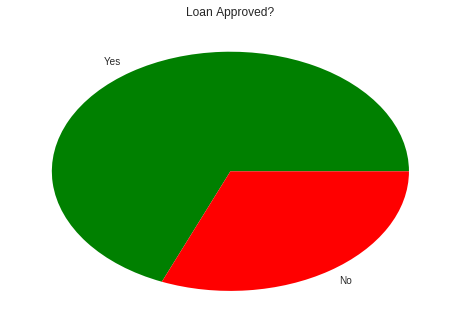

In [26]:
plt.pie([(df_train['Loan_Status'] == 1).sum(), (df_train['Loan_Status'] == 0).sum()], labels=['Yes', 'No'] ,colors=['g', 'r'])
plt.title('Loan Approved?')
plt.show()

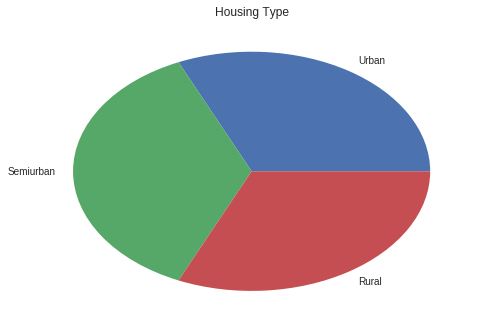

In [27]:
plt.pie([(df_train['Property_Area'] == 3).sum(), (df_train['Property_Area'] == 2).sum(), (df_train['Property_Area'] == 3).sum()], labels=['Urban', 'Semiurban', 'Rural'])
plt.title('Housing Type')
plt.show()

# Training and Testing data

In [28]:
X = df_train.drop(['Loan_Status'], axis=1)
y = df_train['Loan_Status']

In [29]:
from sklearn.model_selection import train_test_split
X_train, X_cv, y_train, y_cv = train_test_split(X, y, train_size=0.7)

## Using Naive Bayes

In [30]:
from sklearn.naive_bayes import GaussianNB
clf = GaussianNB()
clf = clf.fit(X_train, y_train)
clf.score(X_cv, y_cv)

0.82162162162162167

## Using Decision Tree Classifier

In [31]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier()
clf = clf.fit(X_train, y_train)
clf.score(X_cv, y_cv)

0.68108108108108112

## Using Random Forest

In [32]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier()
clf = clf.fit(X_train, y_train)
clf.score(X_cv, y_cv)

0.76756756756756761

## Using Logistic Regression

In [33]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression()
clf = clf.fit(X_train, y_train)
clf.score(X_cv, y_cv)

0.82162162162162167

## By Manually Classifying

In [34]:
def predict(X):
    return X['Credit_History'].apply(lambda x: 1 if x == 1 else 0).values

from sklearn.metrics import accuracy_score
accuracy_score(y_cv, predict(X_cv))

0.82162162162162167

As manual classification is best, this means we have failed miserably.

## Predicting

In [35]:
result = pd.DataFrame(clf.predict(X_test), columns=['Loan_Status'])
result.index.names = ['Loan_ID']
result.index = X_test.index
result['Loan_Status'] = result['Loan_Status'].apply(lambda x: 'Y' if x == 1 else 'N')
result.to_csv('prediction.csv')
result.head()

,Loan_Status
Loan_ID,
LP001015,Y
LP001022,Y
LP001031,Y
LP001035,Y
LP001051,Y
